## SVM for diabetes prediction

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import qusvm

In [2]:
def data_split(X, Y):

    X_train, X_holdout, Y_train, Y_holdout = train_test_split(
        X, Y, test_size=0.02, random_state=1
    )

    X_train, X_test, Y_train, Y_test = train_test_split(
        X_train, Y_train, test_size=0.2, random_state=1
    )
    return X_train, Y_train, X_test, Y_test, X_holdout, Y_holdout

In [4]:
df = pd.read_csv('diabetes.csv')

X = df.drop(columns='Outcome').values
Y = df['Outcome'].values

X_train, Y_train, X_test, Y_test, X_holdout, Y_holdout = data_split(X, Y)

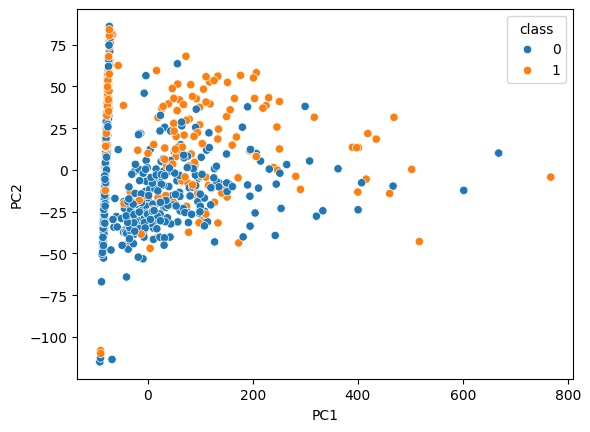

In [5]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
data_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
data_pca["class"] = Y
sns.scatterplot(data=data_pca, x="PC1", y="PC2", hue="class")
plt.show()

### Linear Kernel

In [17]:
selected_kernel = "linear"

In [20]:
clf = qusvm.svm_models[selected_kernel]["model"]

clf.fit(X_train, Y_train)

Y_pred = clf.predict(X_test)

conf_matrix = confusion_matrix(Y_test, Y_pred)

print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[95 10]
 [21 25]]


In [27]:
tn, fp, fn, tp = conf_matrix.ravel()

accuracy = (tp + tn) / (tp + tn + fp + fn)
recall_score = tp / (tp + fn)

print(f'Accuracy: {accuracy}')
print(f'Recall: {recall_score}')

Accuracy: 0.7947019867549668
Recall: 0.5434782608695652


### Polynomial Kernel

In [29]:
selected_kernel = "poly"

In [30]:
clf = qusvm.svm_models[selected_kernel]["model"]

clf.fit(X_train, Y_train)

Y_pred = clf.predict(X_test)

conf_matrix = confusion_matrix(Y_test, Y_pred)

print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[97  8]
 [27 19]]


In [31]:
tn, fp, fn, tp = conf_matrix.ravel()

accuracy = (tp + tn) / (tp + tn + fp + fn)
recall_score = tp / (tp + fn)

print(f'Accuracy: {accuracy}')
print(f'Recall: {recall_score}')

Accuracy: 0.7682119205298014
Recall: 0.41304347826086957


### RBF Kernel

In [33]:
selected_kernel = "rbf"

In [34]:
clf = qusvm.svm_models[selected_kernel]["model"]

clf.fit(X_train, Y_train)

Y_pred = clf.predict(X_test)

conf_matrix = confusion_matrix(Y_test, Y_pred)

print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[96  9]
 [26 20]]


In [36]:
tn, fp, fn, tp = conf_matrix.ravel()

accuracy = (tp + tn) / (tp + tn + fp + fn)
recall_score = tp / (tp + fn)

print(f'Accuracy: {accuracy}')
print(f'Recall: {recall_score}')

Accuracy: 0.7682119205298014
Recall: 0.43478260869565216


### Sigmoid Kernel

In [51]:
selected_kernel = "sigmoid"

In [52]:
clf = qusvm.svm_models[selected_kernel]["model"]

clf.fit(X_train, Y_train)

Y_pred = clf.predict(X_test)

conf_matrix = confusion_matrix(Y_test, Y_pred)

print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[78 27]
 [39  7]]


In [39]:
tn, fp, fn, tp = conf_matrix.ravel()

accuracy = (tp + tn) / (tp + tn + fp + fn)
recall_score = tp / (tp + fn)

print(f'Accuracy: {accuracy}')
print(f'Recall: {recall_score}')

Accuracy: 0.5629139072847682
Recall: 0.15217391304347827


### Quantum Kernel

In [53]:
selected_kernel = "quantum"
num_qubits = 8

In [54]:
clf = qusvm.svm_models[selected_kernel]["model"](num_qubits)

clf.fit(X_train, Y_train)

Y_pred = clf.predict(X_test)

conf_matrix = confusion_matrix(Y_test, Y_pred)

print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[90 15]
 [39  7]]


In [56]:
tn, fp, fn, tp = conf_matrix.ravel()

accuracy = (tp + tn) / (tp + tn + fp + fn)
recall_score = tp / (tp + fn)

print(f'Accuracy: {accuracy}')
print(f'Recall: {recall_score}')

Accuracy: 0.6423841059602649
Recall: 0.15217391304347827


## Comparison

Since this classification problem is about diabetes, we are interested in maximize the true positives ratio, so we can select the model that better predicts diabetes diagnosis. That is the reason why we have calculated the recall metric.

This table shows the resuls of each model, sorted by recall:

| **Kernel** | **Recall** | **Accuracy** |
|------------|------------|--------------|
| Linear     | 0.54       | 0.79         |
| RBF        | 0.43       | 0.77         |
| Polynomial | 0.41       | 0.77         |
| Quantum    | 0.15       | 0.64         |
| Sigmoid    | 0.15       | 0.56         |

We observe reasonably good results in terms of accuracy. However, the recall score is more important in this case and is quite poor. A neural network might improve the results.